In [ ]:
# Install required libraries
!pip install yfinance
!pip install matplotlib
!pip install yfinance
!pip install plotly
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import plotly.express as px

In [3]:
tesla_data = yf.Ticker("TSLA")

# Get historical market data
tesla_data = tesla_data.history(period="max")

# Reset the index and display the first five rows
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [ ]:
tesla_revenue
print(tesla_revenue.tail())

In [58]:
url = "https://en.wikipedia.org/wiki/Tesla,_Inc."

In [59]:
data = requests.get(url).text

In [63]:
soup = BeautifulSoup(data, 'lxml')
tables = soup.find_all("table", {"class": "wikitable"})


In [67]:
# Loop through each table to find the one containing 'Revenue (US$ m)' and 'Year'
tesla_revenue_data = None
for table in tables:
    # Check if the table contains 'Revenue (US$ m)' and 'Year' columns
    if any('Revenue' in th.text for th in table.find_all('th')) and any('Year' in th.text for th in table.find_all('th')):
        tesla_revenue_data = pd.read_html(str(table))[0]
        break  # Stop once the correct table is found

# If the table is found, display the last 5 rows
if tesla_revenue_data is not None:
    tesla_revenue_data.columns = tesla_revenue_data.columns.droplevel()  # Drop multi-level columns if any
    print(tesla_revenue_data.tail())
else:
    print("No table containing 'Revenue (US$ m)' and 'Year' found.")


ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [69]:
tesla = yf.Ticker("TSLA")

# Get the financials (including revenue)
tesla_financials = tesla.financials

# Display the revenue data
tesla_revenue = tesla_financials.loc['Total Revenue']

# Convert the revenue data to a DataFrame for better visualization
tesla_revenue_df = pd.DataFrame(tesla_revenue).transpose()

# Display the last 5 rows
print(tesla_revenue_df.tail())

                  2023-12-31     2022-12-31     2021-12-31     2020-12-31
Total Revenue  96773000000.0  81462000000.0  53823000000.0  31536000000.0


In [71]:
gme = yf.Ticker("GME")

# Get historical stock data (you can specify a date range or use default max range)
gme_data = gme.history(period="1y")  # You can change "1y" to "5d", "max", etc.

# Reset the index to make the date a column
gme_data_reset = gme_data.reset_index()

# Save the dataframe to a CSV file
gme_data_reset.to_csv("gme_stock_data.csv", index=False)

# Display the first 5 rows of the dataframe
print(gme_data_reset.head())
      

                       Date   Open   High    Low  Close   Volume  Dividends  \
0 2024-01-11 00:00:00-05:00  15.65  15.80  15.24  15.25  2992200        0.0   
1 2024-01-12 00:00:00-05:00  15.30  15.62  14.73  14.75  2475500        0.0   
2 2024-01-16 00:00:00-05:00  14.60  14.62  13.93  13.98  3581200        0.0   
3 2024-01-17 00:00:00-05:00  13.86  14.11  13.71  14.08  2706200        0.0   
4 2024-01-18 00:00:00-05:00  14.20  14.77  14.05  14.29  3906000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [73]:

# Get GameStop stock data (GME)
gme = yf.Ticker("GME")

# Get the financials (including revenue)
gme_financials = gme.financials

In [74]:
gme_revenue = gme_financials.loc['Total Revenue']

# Convert the revenue data to a DataFrame for better visualization
gme_revenue_df = pd.DataFrame(gme_revenue).transpose()

# Display the last 5 rows of the revenue data
print(gme_revenue_df.tail())

                 2024-01-31    2023-01-31    2022-01-31    2021-01-31  \
Total Revenue  5272800000.0  5927200000.0  6010700000.0  5089800000.0   

              2020-01-31  
Total Revenue        NaN  


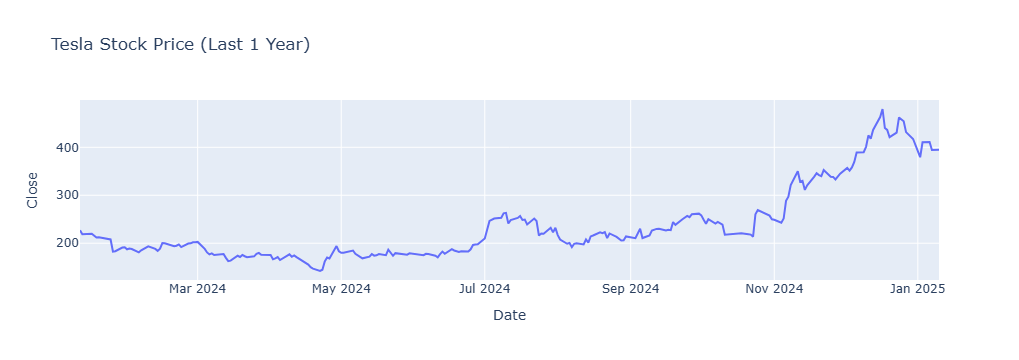

In [78]:
# Get Tesla stock data (TSLA)
tesla = yf.Ticker("TSLA")

# Get historical stock data (e.g., past 1 year)
tesla_data = tesla.history(period="1y")

# Plot the closing price of Tesla stock using plotly
fig = px.line(tesla_data, x=tesla_data.index, y='Close', title='Tesla Stock Price (Last 1 Year)')

# Show the graph
fig.show()

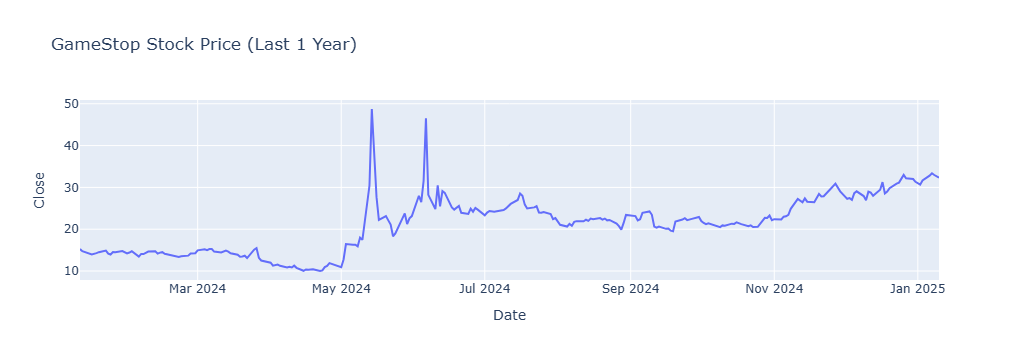

In [79]:
gme = yf.Ticker("GME")

# Get historical stock data (e.g., past 1 year)
gme_data = gme.history(period="1y")

# Plot the closing price of GameStop stock using plotly
fig = px.line(gme_data, x=gme_data.index, y='Close', title='GameStop Stock Price (Last 1 Year)')

# Show the graph
fig.show()